# LCA for different transport modes with a focus on bicycles

The notebook calculates the life cycle impacts of bicycles and ebikes.
* Calculate the energy requirement of powering bicycles
* Calculate the impact of nutrition
* Compare these impacts to other modes of transport.

In [ ]:
#to-does:
# add walking?
# assume slope to be zero?
# ask Alois if mode processes are normalized to one passenger, if not ask for utilization factor
# add fuel requirements of electric bike



In [ ]:
# known issues
# car load factor is global average
#liquids is only mapped to gasoline not diesel
#active transport modes are not differentiated in REMIND
# ecoinvent processes: 
# transport, passenger car, fleet average, {BEV, FCEV, ICEV-d, ICEV-p, ICEV-g, HEV-d, HEV-p, HEV-g, PHEV-d, PHEV-p, PHEV-g}, <year>, -d = Diesel, -p = Petrol, -g = Gas

In [1]:
# sector impacts
# ES|Transport|VKM|Pass|Road|LDV|{BEV, FCEV, Gases, Hybrid Electric, Hybrid Liquids, Liquids}
# die Variablen ohne das VKM sind die pkms

In [1]:
import pickle
pickle.HIGHEST_PROTOCOL = 4
import pandas as pd
import math as ma
import warnings
import matplotlib.pyplot as plt

import pprint
import brightway2 as bw
import bw2io
import seaborn as sn


warnings.filterwarnings('ignore')

year = 2030
scenario = "bike-lca_lca_Budg1100_ElecPush"

remind_report        = "data\\Budg1100_ElecEra_2020-09-17_17.17.49\\REMIND_generic_Budg1100_ElecEra_withoutPlus.mif"
lca_database         = "data\\brightway2-project-bike-lca_lca_Budg1100_ElecPush-backup.22-January-2021-08-54PM.tar.gz"
magpie_report        = "data\\magpie_C_SDP-PkBudg1100-mag-4.mif"
literature_report    = "data\\bicycles_rule_plot_source.csv"
air_pollution_report = "data\\air_pollution\\results_dalys_SSP2_Budg1100_ElecEra_SSP2_IIASA_aneris_downscaling_.csv"

urban_population = "data\\pop.mif"

In [2]:
# read REMIND lca results
bw.restore_project_directory(lca_database)

Restoring project backup archive - this could take a few minutes...


'bike-lca_lca_Budg1100_ElecPush'

In [3]:
bw.projects.set_current(scenario)
bw.databases

Databases dictionary with 8 object(s):
	biosphere3
	ecoinvent 3.7 cutoff
	ecoinvent_remind_Budg1100_ElecPush_2020
	ecoinvent_remind_Budg1100_ElecPush_2025
	ecoinvent_remind_Budg1100_ElecPush_2030
	ecoinvent_remind_Budg1100_ElecPush_2035
	ecoinvent_remind_Budg1100_ElecPush_2040
	ecoinvent_remind_Budg1100_ElecPush_2050

In [4]:
ei = bw.Database("ecoinvent_remind_Budg1100_ElecPush_" + str(year))

In [5]:
bw2io.export.csv.write_lci_csv("ecoinvent 3.7 cutoff")

UnicodeEncodeError: 'charmap' codec can't encode character '\u2192' in position 2141: character maps to <undefined>

In [ ]:
#transport, passenger car, fleet average, {BEV, FCEV, ICEV-d, ICEV-p, ICEV-g, HEV-d, HEV-p, HEV-g, PHEV-d, PHEV-p, PHEV-g}, <year>, -d = Diesel, -p = Petrol, -g = Gas
#ES|Transport|VKM|Pass|Road|LDV|{BEV, FCEV, Gases, Hybrid Electric, Hybrid Liquids, Liquids}

In [ ]:
#map remind variable to ecoinvent variable
ecoinvent_activity_transport_mapping =        {'ES|Transport|Pass|Road|LDV|BEV': "'transport, passenger car, fleet average, BEV, " + str(year)+"' (kilometer, region, None)",
                                               'ES|Transport|Pass|Road|LDV|FCEV': "'transport, passenger car, fleet average, FCEV, " + str(year)+"' (kilometer, region, None)",
                                               'ES|Transport|Pass|Road|LDV|Gases': "'transport, passenger car, fleet average, ICEV-g, " + str(year)+"' (kilometer, region, None)",
                                               'ES|Transport|Pass|Road|LDV|Hybrid Electric': "'transport, passenger car, fleet average, PHEV-p, " + str(year)+"' (kilometer, region, None)",
                                               'ES|Transport|Pass|Road|LDV|Hybrid Liquids': "'transport, passenger car, fleet average, HEV-p, " + str(year)+"' (kilometer, region, None)",
                                               'ES|Transport|Pass|Road|LDV|Liquids': "'transport, passenger car, fleet average, ICEV-p, " + str(year)+"' (kilometer, region, None)"}



In [7]:
#sep liq into pet and diesel?
#just copy gasoline and assume a diesel share and make diesel process 

#see
%run -i ./script/trans_modes_glo.py



'transport, passenger car, fleet average, BEV, 2020' (kilometer, CAZ, None)
0.06958415030762305
'transport, passenger car, fleet average, BEV, 2030' (kilometer, CHA, None)
0.22566518588173964
'transport, passenger car, fleet average, BEV, 2030' (kilometer, EUR, None)
0.20663028685698165
'transport, passenger car, fleet average, BEV, 2030' (kilometer, IND, None)
0.001972512968202739
'transport, passenger car, fleet average, BEV, 2030' (kilometer, JPN, None)
0.01778461558468181
'transport, passenger car, fleet average, BEV, 2030' (kilometer, LAM, None)
0.08586272606550507
'transport, passenger car, fleet average, BEV, 2030' (kilometer, MEA, None)
0.04132126677986504
'transport, passenger car, fleet average, BEV, 2030' (kilometer, NEU, None)
0.017967480465984592
'transport, passenger car, fleet average, BEV, 2030' (kilometer, OAS, None)
0.032122641130985854
'transport, passenger car, fleet average, BEV, 2030' (kilometer, REF, None)
0.012235982210987609
'transport, passenger car, fleet ave

### Calculation of kcal/km bicycle

The energy requirements of a bicycle are mainly determined by the gravity, rolling recistance, mechanic loss and, most importantly, aerodynamic drag.

slope assumed to be zero since commutes begin and end at the same elevation.
$\qquad F_{\mbox{gravity}} = g0 \sin(\arctan(\frac{s}{100})) w = 0 \\
\text{where $g0$ = gravitational acceleration, $s$ = slope and $w$ = weight of rider and bike}$ 

rolling resistance
$\qquad F_{\mbox{rolling}} = g0 \cos(\arctan(\frac{s}{100})) w c_{r} \\
\text{where $c_r$ = coefficient of rolling resistance}$

Aerodynamic drag
$\qquad F_{\mbox{aero}} = 0.5 c_{d} A \rho V^2 \\
\text{where $c_{d}$ = drag coefficient, $A$ = frontal area, $\rho$= air density and $V$ is speed}$

Power supply by rider:
$\qquad P_{\mbox{rider}} = c_{b} \left[F_{\mbox{gravity}} + F_{\mbox{rolling}} + F_{\mbox{aero}}\right] V \\
\text{where $c_{b}$ = bike efficiency, drivetrain losses and others}$

Food intake:
$\qquad E_{rider} = (P_{\mbox{rider}} \frac{d}{V}) \frac{1}{c_{m}} \\
\text{where $d$ = distance, $c_{m}$ is the muscular efficiency}$ 


do we need to give sources for formulas, they seem quite obvious

Take Frontal Area and Drag Coeff from 
file:///C:/Users/rauner/AppData/Local/Temp/Aerodynamic_drag_in_cycling_Methods_of_assessment.pdf

Muscular efficiency:
https://www.researchgate.net/publication/22014772_Muscular_efficiency_during_steady-rate_exercise_effects_of_speed_and_work_rate

This gives around 15 kcal


In [8]:
ws2kcal = 1/4184
g0 = 9.8067 # m/s2
roh = 1.22601 # kg/m3

s = 0 # %
w = 70 # kg
a = 0.5 # m2

v = 6 # m/2
d = 1000 # m

cr = 0.005
cd = 0.6
cb = 0.05
cm = 0.2


E = (((1-cb)*((g0*ma.sin(ma.atan(s/100))*w)+(g0*ma.cos(ma.atan(s/100))*w*cr)+(0.5*cd*a*roh*pow(v,2)))*v)*d/v)*1/cm * ws2kcal

print("{:.2f} kcal/km of food intake required".format(E))

11.41 kcal/km of food intake required


In [9]:
# Add walking
# take the regression model from https://journals.lww.com/nsca-jscr/Fulltext/2010/10000/Comparison_of_Energy_Expenditure_to_Walk_or_Run_a.29.aspx
# read the kg average body weight from magpie and apply to this formula

#E_walking = (mass (kg) × 0.789 - gender (men = 1, women = 2) × 7.634 + 51.109) / 1.6


### Diet to fuel cycling and ebike

The diet plays a crucial role for the impact of bicycles. We model the nutrition demand and supply with the MAGPIE model. We use the same climate budget and assume a EAT-LANCET low waste diet adoption until 2050.

In [10]:
# Calculate a kcal share mix according to the MAGPIE results
# Calculate a demand/supply share
# Calulate the lca for that
cal2kj = 4.184


In [11]:
#select which nutrition processes are included
#determine their kg/kcal
#see
%run -i ./script/diet_mappings.py

In [12]:
# fill a list with activities present in the magpie_ecoinvent_nutrition_mapping_simple
activities=[]
for value in magpie_ecoinvent_nutrition_mapping_extended.values():
        activities.append([act for act in ei if act['name']==str(value).split("'",2)[1] and 'GLO' in act['location']][0])

#create a new nutrition activity for the 
nutrition = ei.new_activity(code = 'nutrition', name = "Nutrition mix, EAT-Lancet diet convergance in 2050", unit = "kcal")

print("the nutrition consists of:")

#loop over included nutition activities and add amount
for i in range(len(activities)-1):
    act= str(activities[i])
    print(act)

    amt = magpie_intake.query("Variable == @act")[str(year)]
    amt = pd.to_numeric(amt, errors='coerce')
    if(ma.isnan(amt.values[0])):
        amt.values[0] = 0
    print(amt.values[0])

    nutrition.new_exchange(input=activities[i].key,amount=amt.values[0],unit="kg/kcal",type='technosphere').save()

nutrition.save()


the nutrition consists of:
'market for fishmeal, 65-67% protein' (kilogram, GLO, None)
6.9908745247148295e-06
'market for maize seed, organic, at farm' (kilogram, GLO, None)
1.0389942877763694e-05
'market for rice, non-basmati' (kilogram, GLO, None)
0.00010836388157680935
'market for wheat grain, feed' (kilogram, GLO, None)
3.908248216903998e-05
'market for peanut' (kilogram, GLO, None)
7.664178754166081e-06
'market for apple' (kilogram, GLO, None)
0.00013447994865295248
'market for potato' (kilogram, GLO, None)
2.00564032503196e-05
'market for chickpea' (kilogram, GLO, None)
1.0348285396870104e-05
'market for potato' (kilogram, GLO, None)
2.00564032503196e-05
'market for sugar beet pulp' (kilogram, GLO, None)
5.109008557589333e-09
'market for sugar, from sugarcane' (kilogram, GLO, None)
2.162297378427056e-07
'market for dairy' (cubic meter, GLO, None)
1.5234767913888427e-07
'chicken production' (kilogram, GLO, None)
1.1301904685935106e-05
'market for swine for slaughtering, live weigh

### Climate change

Let's do a comparative LCA along the climate change dimension for starters:

In [13]:
# select transport modes to perform lca on

car_load_factor = 2.03 # UCD transport database global average, not chaning in the future

bike = [act for act in ei if "transport, passenger, bicycle" == act["name"] and "RoW" == act["location"]][0]
#print(bike["comment"])

ebike = [act for act in ei if "transport, passenger, electric bicycle" == act["name"] and "RoW" == act["location"]][0]
#print(ebike["comment"])

battery_electric_car = [act for act in ei if "pass_road_ldv_bev" in act["name"]][0]
fuel_cell_car = [act for act in ei if "pass_road_ldv_fcev" in act["name"]][0]
gas_car = [act for act in ei if "pass_road_ldv_gases" in act["name"]][0]
hybrid_electric_car = [act for act in ei if "pass_road_ldv_hybrid_electric" in act["name"]][0]
hybrid_liquids_car = [act for act in ei if "pass_road_ldv_hybrid_liquids" in act["name"]][0]
gasoline_car = [act for act in ei if "pass_road_ldv_liquids" in act["name"]][0]

In [14]:
bw.LCA({gasoline_car: 1}, ('IPCC 2013', 'climate change', 'GWP 100a'))

In [15]:
#do some comparative analysis on technology level
gasoline_car_lca = bw.LCA({gasoline_car: 1/car_load_factor}, ('IPCC 2013', 'climate change', 'GWP 100a'))
gasoline_car_lca.lci()
gasoline_car_lca.lcia()
gasoline_car_lca.score

0.11970736714540947

In [16]:
battery_electric_car_lca = bw.LCA({battery_electric_car: 1/car_load_factor}, ('IPCC 2013', 'climate change', 'GWP 100a'))
battery_electric_car_lca.lci()
battery_electric_car_lca.lcia()
battery_electric_car_lca.score

0.04304059047195227

In [17]:
bike_lca = bw.LCA({bike: 1, nutrition: E}, ('IPCC 2013', 'climate change', 'GWP 100a'))
bike_lca.lci()
bike_lca.lcia()
bike_lca.score

0.015043000732790714

In [18]:
# this nutrition requirement is only an estimate, find better source
ebike_lca = bw.LCA({ebike: 1, nutrition: 5}, ('IPCC 2013', 'climate change', 'GWP 100a'))
ebike_lca.lci()
ebike_lca.lcia()
ebike_lca.score

0.016115118929484456

### Other impact dimensions

Let's look at a range of dimensions using RECIPE indicators.

In [19]:
def indicators(gasoline_car, battery_electric_car_lca, bike_lca, ebike_lca):
    gasoline_car_impacts = {}
    battery_electric_car_impacts = {}
    bike_impacts = {}
    ebike_impacts = {}
    
    for m in methods:
        
        gasoline_car_lca.switch_method(m)
        battery_electric_car_lca.switch_method(m)
        bike_lca.switch_method(m)
        ebike_lca.switch_method(m)
        
        gasoline_car_lca.lcia()
        battery_electric_car_lca.lcia()
        bike_lca.lcia()
        ebike_lca.lcia()
        
        gasoline_car_impacts[m[1]] = gasoline_car_lca.score
        battery_electric_car_impacts[m[1]] = battery_electric_car_lca.score
        bike_impacts[m[1]] = bike_lca.score
        ebike_impacts[m[1]] = ebike_lca.score
        
    full_data = pd.concat({"gasoline_car": pd.DataFrame.from_dict(gasoline_car_impacts, orient="index"),
                           "battery_electric_car": pd.DataFrame.from_dict(battery_electric_car_impacts, orient="index"),
                           "bike": pd.DataFrame.from_dict(bike_impacts, orient="index"), 
                           "ebike": pd.DataFrame.from_dict(ebike_impacts, orient="index")})
    fd = full_data.reset_index().pivot_table(index="level_1", columns="level_0", values=0)
    fd.index.name = "indicator"
    fd.columns.name = "transport mode"
    return fd

In [20]:
methods = [m for m in bw.methods if "ReCiPe Midpoint (H) V1.13" in str(m) and "w/o LT" not in str(m) and "no LT" not in str(m)]
data = indicators(gasoline_car, battery_electric_car_lca, bike_lca, ebike_lca)
data.to_csv("results/impact_pkm_"+str(year)+".csv")

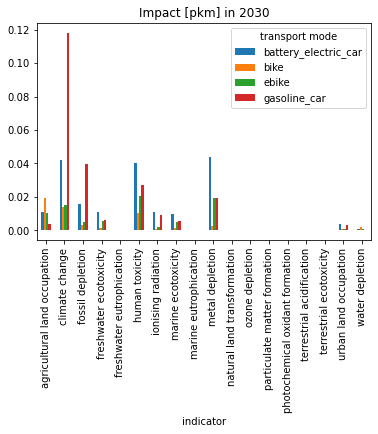

In [21]:
data.plot.bar()
plt.title('Impact [pkm] in ' + str(year))
plt.savefig("plot/impact_pkm_"+str(year)+".pdf", bbox_inches='tight')

In [22]:
print("Most important biosphere flows")
# why does it show two rows?
pprint.pprint(ContributionAnalysis().annotated_top_processes(bike_lca)[:5])

Most important biosphere flows


NameError: name 'ContributionAnalysis' is not defined

## Sectoral contribution of increase bicycle share

* read remind results
* estimate urban share of total passenger transport
* construct different avarage transport activities with different bicycle shares

construct a total activity for all activities
construct a total of totals

In [ ]:
#read population weighted urbanization
non_bike_urban_share = 0.2
urban_population = pd.read_csv(urban_population, sep=';')
urban_population = urban_population[str(year)]
bike_share = ((1-non_bike_urban_share)*urban_population)/100
bike_share = bike_share[0]

In [ ]:
amt_battery_electric_car=pd.to_numeric(remind_pass_road_ldv_bev_total[str(year)], errors='coerce')*1000000000
amt_fuel_cell_car=pd.to_numeric(remind_pass_road_ldv_fcev_total[str(year)], errors='coerce')*1000000000
amt_gas_car=pd.to_numeric(remind_pass_road_ldv_gases_total[str(year)], errors='coerce')*1000000000
amt_hybrid_electric_car=pd.to_numeric(remind_pass_road_ldv_hybrid_electric_total[str(year)], errors='coerce')*1000000000
amt_hybrid_liquids_car=pd.to_numeric(remind_pass_road_ldv_hybrid_liquids_total[str(year)], errors='coerce')*1000000000
amt_gasoline_car=pd.to_numeric(remind_pass_road_ldv_liquids_total[str(year)], errors='coerce')*1000000000

amt_ldv_total = sum((amt_battery_electric_car.values[0],
                    amt_fuel_cell_car.values[0],
                    amt_gas_car.values[0],
                    amt_hybrid_electric_car.values[0],
                    amt_hybrid_liquids_car.values[0],
                    amt_gasoline_car.values[0]))

In [ ]:
# this nutrition requirement is only an estimate, find better source
ldv_total_lca = bw.LCA({battery_electric_car: amt_battery_electric_car/car_load_factor,
                    fuel_cell_car: amt_fuel_cell_car/car_load_factor,
                    gas_car: amt_gas_car/car_load_factor,
                    hybrid_electric_car: amt_hybrid_electric_car/car_load_factor,
                    hybrid_liquids_car: amt_hybrid_liquids_car/car_load_factor,
                    gasoline_car: amt_gasoline_car/car_load_factor}, ('IPCC 2013', 'climate change', 'GWP 100a'))
ldv_total_lca.lci()
ldv_total_lca.lcia()
ldv_total_lca.score

In [ ]:
#also replace non-LDV here?
ldv_total_bike_lca = bw.LCA({battery_electric_car: (amt_battery_electric_car/car_load_factor)*(1-bike_share),
                    fuel_cell_car: (amt_fuel_cell_car/car_load_factor)*(1-bike_share),
                    gas_car: (amt_gas_car/car_load_factor)*(1-bike_share),
                    hybrid_electric_car: (amt_hybrid_electric_car/car_load_factor)*(1-bike_share),
                    hybrid_liquids_car: (amt_hybrid_liquids_car/car_load_factor)*(1-bike_share),
                    gasoline_car: (amt_gasoline_car/car_load_factor)*(1-bike_share),
                    bike: bike_share* amt_ldv_total,
                    nutrition: E*bike_share* amt_ldv_total}, ('IPCC 2013', 'climate change', 'GWP 100a'))


In [ ]:
ldv_total_bike_lca.lci()
ldv_total_bike_lca.lcia()
ldv_total_bike_lca.score

In [ ]:
def indicators_total(ldv_total_lca, ldv_total_bike_lca):
    ldv_total_impacts = {}
    ldv_total_bike_impacts = {}
     
    for m in methods:
        
        ldv_total_lca.switch_method(m)
        ldv_total_bike_lca.switch_method(m)
             
        ldv_total_lca.lcia()
        ldv_total_bike_lca.lcia()
        
        #aggregate to midpoint totals
        #ldv_total_impacts[m[1]] = ldv_total_lca.score
        #ldv_total_bike_impacts[m[1]] = ldv_total_bike_lca.score
        ldv_total_impacts[m] = ldv_total_lca.score
        ldv_total_bike_impacts[m] = ldv_total_bike_lca.score
              
    full_data = pd.concat({"ldv_total": pd.DataFrame.from_dict(ldv_total_impacts, orient="index"),
                           "ldv_total_bike share "+str(bike_share): pd.DataFrame.from_dict(ldv_total_bike_impacts, orient="index")})
    fd = full_data.reset_index().pivot_table(index="level_1", columns="level_0", values=0)
    fd.index.name = "indicator"
    fd.columns.name = "scenario"
    return fd

In [ ]:
data = indicators_total(ldv_total_lca, ldv_total_bike_lca)
data.to_csv("results/impact_total_bike_share_"+str(bike_share)+'_'+str(year)+".csv")

In [ ]:
data.plot.bar()
plt.title('Impact total in ' + str(year))
plt.savefig("plot/impact_total_bike_share_"+str(bike_share)+'_'+str(year)+".pdf", bbox_inches='tight')

In [ ]:
top_bike_lca =  ContributionAnalysis().annotated_top_processes(bike_lca)
top_bike_lca = pd.DataFrame(top_bike_lca)
top_bike_lca.to_csv("bike_lca" + ".csv")

## Calc indicators not in the model and add them to the plot

In [ ]:

#rbind to 2030
#rbind to data per km

%run -i ./script/lit.py
%run -i ./script/air_pollution.py

data = pd.concat([data, literature, air_pollution_res])  

# which units do the recipe indicators have?

# add the general classification and plot seperately

# praking urban area cost ?




In [ ]:
literature

In [ ]:
data.plot.bar()
plt.title('Impact total in ' + str(year))
plt.savefig("plot/impact_total_bike_share_"+str(bike_share)+'_'+str(year)+".pdf", bbox_inches='tight')
data.to_csv("data.csv")

In [ ]:
df = pd.read_csv("results/data_1.csv", sep=';')
#add ldv total
#distribute equally to LDV and save for plotting

In [ ]:
print("Most important activities")
# why does it show two rows?
activities = ContributionAnalysis().annotated_top_processes(ldv_total_lca)
#flows = ContributionAnalysis().annotate(ldv_total_lca)
activities = [m for m in activities if "synthetic rubber production" in str(m)]


In [ ]:
# also get the 2015 numbers and scale with that

# activities = str(activities[0]).split('(', 1)[2]

float(str(activities[0]).split('(', 1)[1].split(',', 1)[0]) + float(str(activities[1]).split('(', 1)[1].split(',', 1)[0])

In [ ]:
[m for m in bw.methods if "obsolete" not in str(m)]

In [ ]:
# also make per km with vkm?
# divide by vkm ?
# append all them to the data
# do it by vkm
# then put it to pkm
# add units
